# 04-2. 확률적 경사 하강법
- 새로운 데이터가 조금씩 들어올때 마다 훈련을 시키면 모델 훈련 시키기 위한 데이터가 커짐
- 일부를 버리는 방식은 위험성이 있어 추천하지 않음
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련 하는 방법-> 점진적 학습
- 대표적인 점진적 학습 알고리즘은 확률적 경사 하강법 

In [ ]:
# 가장 빠른길을 (경사가 가파른) 따라 원하는 지점에 도달하는 것이 목표 


In [2]:
#1
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [5]:
#2
#species 열은 타겟 데이터, 나머지 열은 입력 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height','Width']]
fish_target = fish['Species']

In [6]:
#3
#사이킷런의 train_test_split 함수를 사용해 훈련세트와 테스트세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
#4
#표준화 전처리
#훈련세트에서 학습한 통계값으로 테스트 세트도 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
#5
#확률적 경사 하강법을 제공하는 분류용 클래스는 SGDClassifier
from sklearn.linear_model import SGDClassifier

In [9]:
#6
#2개의 매개변수를 지정함. loss=손실함수 종류 지정, 훈련 세트 10번 반복
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/user/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
#7
#훈련 세트, 테스트 세트 점수
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


In [11]:
#8
#에포크 마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트 준비
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [12]:
#9
#300번 에포크 동안 훈련을 반복하여 진행
#반복마다 훈련,테스트 세트의 점수를 계산해서 train_score, test_score 리스트에 추가
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

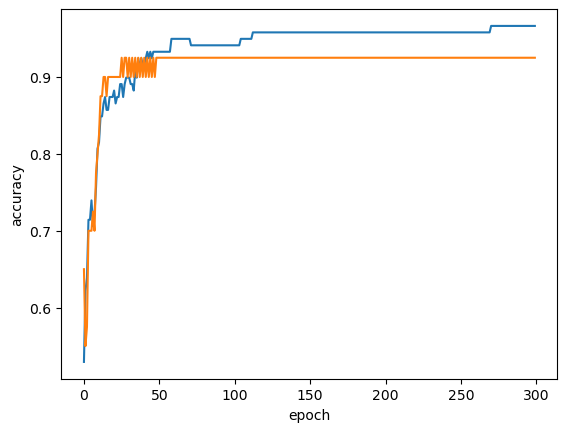

In [13]:
#10
#그래프로 그려 훈련,테스트 세트의 점수 기록
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#11
#SGDClassifier 반복 횟수를 100에 맞추고 모델 다시 훈련
#훈련,테스트세트 점수 출력
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [ ]:
#12
#SGDClassifier의 매개변수의 기본값은 'hinge'
#여러 종류의 손실함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원
sc=SGDClassifier(loss='hinge',max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
